<a href="https://colab.research.google.com/github/rizkynalfian/Tugas-5-DTI/blob/master/Multiple-regression-linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

In [34]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7,7)
plt.style.use('ggplot')

In [35]:
# Import Dataset
df_piesales = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_piesales

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


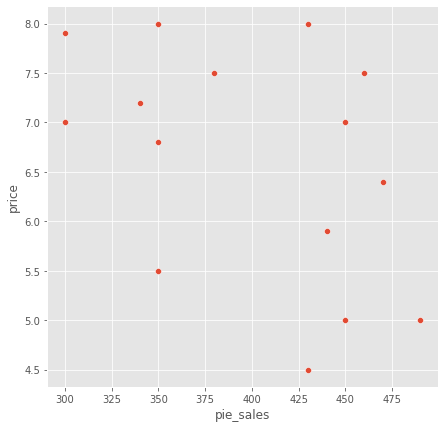

In [36]:
# Visualisasi data menggunakan scatterplot
sns.scatterplot(x="pie_sales", y="price", data= df_piesales)

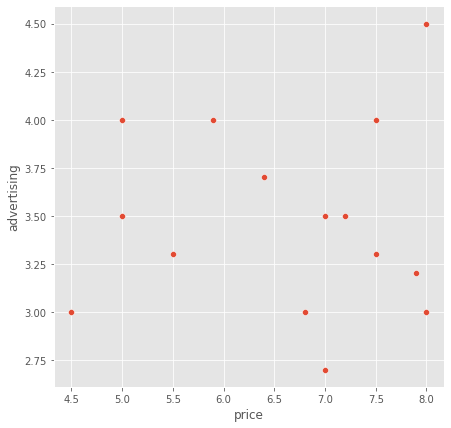

In [37]:
# Visualisasi data menggunakan scatterplot
sns.scatterplot(x="price", y="advertising", data= df_piesales)

# **Regression using Sklearn**

In [38]:
X = df_piesales[['pie_sales']]
Y = df_piesales['price']
Z = df_piesales ['advertising']

In [39]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y, Z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 9.948886708083691
Coefficients: 
 [-0.00824545]


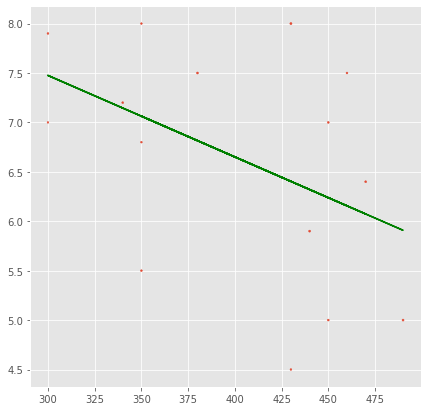

In [30]:
# Visualizing Linear Regression
plt.scatter(X, Y, Z)
plt.plot(X, regr.predict(X), color = "green")
plt.show()

In [31]:
# prediksi dengan sklearn
new_pie_sales = 2500
print ('Predicted  pie price: \n', regr.predict([[new_pie_sales]]))

Predicted  pie price: 
 [-10.66474801]


# **Regression using Statsmodels**

In [32]:
X = sm.add_constant(X) # adding a constant

In [33]:
model = sm.OLS(Y, X,).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.179
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0979
Time:                        15:48:43   Log-Likelihood:                -21.502
No. Observations:                  15   AIC:                             47.00
Df Residuals:                      13   BIC:                             48.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8781      1.853      5.332      0.0